# EDA in Fifa 23 - Ultimate team Dataset
*EDA - Exploratory Data Analysys*

## Context
In Fifa 23, the Ultimate Team game mode allows players to build teams using "cards" representing real-life players, with multiple versions available.

Every month, new campaigns are launched by developers with updated player versions to enhance team performance. 

## Goal
The goal of this notebook is to load, cleaning and analyze the dataset.

## The data
The data was obtained by scraping information from the website Futbin.com, purely for study purposes.

### Explaning the data:

- Name: Name of player
- Team: Team of player
- Country: Country of player
- League: League of player
- Rating: Overall rating of player, using the stats to calculate the overall
- Rare: The lever of rarity of player, could be Rare or Non-rare
- Version Color: Version of card's player
- Position: Main position of player
- Other position: Variaty of position that player can play
- Version: The campaign version of this card
- Run type: Type of running, differs in game
- Price: Price of this card when the data was extracted
- Skill: Skill moves, the ability of execute some dribles
- Weak foot: The ability of using the weak foot.
- Attack rate: The ability of going to attack
- Defense rate: The ability of going to defense
- Pace: Ability to run (0 - 100)
- Shoot: Ability to shoot (0 - 100)
- Pass: Ability to pass (0 - 100)
- Drible: Ability to drible/ agility (0 - 100)
- Defense: Ability to execute defensive moves (0 - 100)
- Physical: Physical ability (0 - 100)
- Body type: Type of body, some players have a unique body type
- Height (cm): Player's Height in centimeters
- Weight (kg): Player's weight in kilograms
- Popularity: Upvotes/ feedbak of players in Futbin website
- Base stats: Stats considering Pace, Shoot, Pass, Drible, Defense and Physical
- In game stats: Stats considering all atributes and player's behaviour in game
- Game version: Ultimate team version
- Updated at: Date of extraction

# Step 1 - Import Libs, load data and a overview on Dataframe
The first step is import the libs that we'll use in this project.

We should load the data from a local file (csv) and store it in a dataframe.

After that, we should take a look on the dataset, check their dataypes, the size and etc.

In [ ]:
import pandas as pd
import re
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# define style for charts
plt.style.use('ggplot')

# expand number of columns to better viz
pd.set_option('display.max_columns', 50)

%load_ext nb_black

df_players = pd.read_parquet("data/players.parquet")

In [3]:
# check the size of dataset (rows, columns)
df_players.shape

(4020, 30)

<IPython.core.display.Javascript object>

In [4]:
# check 10 random samples of dataset
df_players.sample(10)

,Name,Team,Country,League,Rating,Rare,Version_color,Position,Other_Positions,Version,Run_type,Price,Skill,Weak_foot,Attack_rate,Defense_rate,Pace,Shoot,Pass,Drible,Defense,Physical,Body_type,Height_cm,Weight (kg),Popularity,Base_Stats,In_Game_Stats,Game_version,Updated_at
2772,Houssem Aouar,OL,France,Ligue 1,79,non-rare,gold,CAM,"CM,LM",Normal,Controlled,1.6K,4,3,H,L,71,70,78,83,64,68,Unique,175,70,52,434,2105,FIFA 23,2023-04-17
2576,Uğurcan Çakır,Trabzonspor,Turkey,Süper Lig (TUR 1),80,rare,gold,GK,,,Controlled,700,1,3,M,M,80,77,72,82,54,81,High & Average,191,82,27,446,994,FIFA 23,2023-04-17
501,Harry Kane,England,England,World Cup,89,rare,wc_player gold,ST,CF,World Cup Player,Lengthy,0,3,5,H,H,68,91,83,82,47,82,Unique,188,89,10,453,2231,FIFA 23,2023-04-17
14,Pelé,FUT ICONS,Brazil,Icons,95,rare,icon gold,CF,"CAM,ST",Icon,Explosive,2.79M,5,4,H,M,96,93,90,95,56,75,Unique,173,69,2098,505,2452,FIFA 23,2023-04-17
1471,Kasper Schmeichel,OGC Nice,Denmark,Ligue 1,85,rare,if gold,GK,,IF,Controlled,20.5K,1,3,M,M,84,81,82,88,47,83,High & Stocky,189,89,54,465,1005,FIFA 23,2023-04-17
2398,Alex Telles,Brazil,Brazil,World Cup,81,rare,wc_player gold,LB,LWB,World Cup Player,Controlled,0,3,2,H,L,80,75,82,78,76,72,Unique,181,71,0,463,2259,FIFA 23,2023-04-17
3184,Stefano Sensi,AC Monza,Italy,Serie A TIM,78,non-rare,gold,CM,CAM,,Explosive,1K,4,4,M,M,75,61,83,84,65,57,Short & Lean-,168,62,9,425,2072,FIFA 23,2023-04-17
1253,Wojciech Szczesny,Poland,Poland,World Cup,86,rare,wc_player gold,GK,,World Cup Player,Controlled,0,1,3,M,M,86,81,73,87,49,86,High & Average+,195,90,27,462,966,FIFA 23,2023-04-17
2184,João Moutinho,Portugal,Portugal,World Cup,82,rare,wc_player gold,CM,,World Cup Player,Controlled,0,3,4,M,M,48,72,85,80,72,67,Short & Lean-,170,61,-1,424,2161,FIFA 23,2023-04-17
3767,Marvin Schwäbe,1. FC Köln,Germany,Bundesliga,77,non-rare,gold,GK,,,Controlled,700,1,3,M,M,77,73,78,80,47,75,High & Average,190,86,23,430,1022,FIFA 23,2023-04-17


<IPython.core.display.Javascript object>

In [4]:
# check the name and the type of each column, and if there is some missing values
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6000 non-null   object 
 1   Team             6000 non-null   object 
 2   Country          6000 non-null   object 
 3   League           6000 non-null   object 
 4   Rating           6000 non-null   int64  
 5   Rare             6000 non-null   object 
 6   Version_color    6000 non-null   object 
 7   Position         6000 non-null   object 
 8   Other_Positions  4413 non-null   object 
 9   Version          5335 non-null   object 
 10  Run_type         6000 non-null   object 
 11  Price            6000 non-null   object 
 12  Skill            6000 non-null   int64  
 13  Weak_foot        6000 non-null   int64  
 14  Attack_rate      6000 non-null   object 
 15  Defense_rate     6000 non-null   object 
 16  Pace             6000 non-null   int64  
 17  Shoot         

# Step 2 - Data preparation
In this step we prepare the data for further analysis, it's included:
- Normalize the column name
- Normalize the prices
- Adjust the data types
- Deal with missing values
- Deal with duplicated values
- Deal with 'rare' column with wrong values

## 2.1 Normalize column name
The data set has a pattern in the column names, but it's easier to manipulate if they are with no space and lowercase, so let's implement this simple fix.

In [5]:
columns = df_players.columns.str.replace(" ", "_")\
                            .str.replace("(", "")\
                            .str.replace(")", "")\
                            .str.lower()

df_players.columns = list(columns)

C:\Users\Felipe Mayer\AppData\Local\Temp\ipykernel_19832\2323474123.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace("(", "")\
C:\Users\Felipe Mayer\AppData\Local\Temp\ipykernel_19832\2323474123.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace(")", "")\


## 2.2 Normalize the price
The column price, as you may notice, is a Object, it means, a string. We'll use this column to some analysis so it's crucial to change them to a numeric value and normalize it.

The numbers are expressed with K for thousand and M to million, for exemple 14.000 it's 14K. So we need to change the letter (K or M) to correspodent 0's (000 and 000000). After that, change the datatype to integer.

In [6]:
df_players['price'] = df_players['price'].replace({'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(np.int64)

df_players['price']

0        4930000
1        5920000
2        2970000
3       14380000
4        3800000
          ...   
5995        1500
5996         700
5997         550
5998         800
5999         650
Name: price, Length: 6000, dtype: int64

## 2.3 Adjust the Data type

As you may notice, the dataset loaded has a good data type definition, excepts for "updated_at" column, it's a Object but it's a date, so we need to change it's data type.

In [7]:
df_players['updated_at'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6000 entries, 0 to 5999
Series name: updated_at
Non-Null Count  Dtype 
--------------  ----- 
6000 non-null   object
dtypes: object(1)
memory usage: 47.0+ KB


In [8]:
df_players['updated_at'] = df_players['updated_at'].astype('datetime64[ns]')

In [9]:
df_players['updated_at'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6000 entries, 0 to 5999
Series name: updated_at
Non-Null Count  Dtype         
--------------  -----         
6000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 47.0 KB


In [10]:
df_players['updated_at'].sample(5)

1300   2023-03-28
551    2023-03-28
3106   2023-03-28
4749   2023-03-28
3321   2023-03-28
Name: updated_at, dtype: datetime64[ns]

## 2.4 Deal with whitespace

Some data has whitespace, since the data was scrapped so we need to remove it. To make it easier we will remove the whitespace of every String column, even if it doens't needed

In [11]:
for col in df_players.columns:
    if df_players[col].dtype == 'object':
        df_players[col] = df_players[col].str.strip()

## 2.5 Deal with missing values 
There is some columns with missing values, let's deal with deal properly.

- For "other_positions" column, it's fine to have some missing values, not every player has other positions to play, so let's leave it null.
- For "version" column, we need to understand which players without a version and why, so we can deal with that.
- For "height" and "weight" columns, we need to understand below what's happen and choose the best way to deal it.
- For "body_type" column, there is a patter to define the body type of player, we can user it to fill the null values.

In [12]:
df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1587
version             665
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type            22
height_cm             1
weight_kg            22
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
dtype: int64

### 2.5.1 Deal with "version" column
As you can see below, there is some players without 'version' filled, but they belong to sub-groups with same 'version_color'. We'll use the 'version-color' information to fill the 'version' missing value columns.

In [13]:
df_players[df_players['version_color'].isin(df_players[df_players['version'].isna()]\
                                            ['version_color'].unique())]\
                                            [['version', 'version_color' ]]\
                                            .value_counts(dropna=False)

version       version_color      
Normal        gold                   977
NaN           gold                   640
non-rare      gold                   104
Rare          gold                    97
Libertadores  libertadores_b gold     38
NaN           libertadores_b gold     15
Sudamericana  sudamericana gold       11
NaN           bd_icon gold             9
Non-Rare      gold                     8
SBC           bd_icon gold             1
NaN           sudamericana gold        1
dtype: int64

In [14]:
df_players['version'] = df_players['version'].fillna(df_players['version_color'])

In [15]:
df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1587
version               0
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type            22
height_cm             1
weight_kg            22
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
dtype: int64


### 2.5.2 Deal with "height" and "weight" columns
There is a correlation between height and weight, so we'll fill the missing values of 'weight' with the avarage value of other players with same "height"

In [16]:
# check the correlation between height and weight
df_players['height_cm'].corr(df_players['weight_kg'])

0.7543135913327226

Some players has 0 as weight, let's change it to NaN and deal with them.

In [17]:
df_players['weight_kg'].replace(0, np.nan, inplace=True)

In [18]:
df_player_groupedby_height = df_players[df_players['weight_kg'].notnull()].groupby('height_cm')['weight_kg'].mean()

df_player_groupedby_height.sample(n=5)

height_cm
204.0    75.000000
171.0    67.463158
190.0    82.995455
164.0    63.000000
169.0    65.492063
Name: weight_kg, dtype: float64

In [19]:
df_players['weight_kg'] = df_players['weight_kg'].fillna(df_players['height_cm'].map(df_player_groupedby_height))

df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1587
version               0
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type            22
height_cm             1
weight_kg             1
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
dtype: int64

For the players with Height or Weight we'll get the mean considering his position

In [20]:
df_player_groupedby_position = df_players[df_players['weight_kg'].notnull()].groupby('position')[['weight_kg', 'height_cm']].mean()

df_player_groupedby_position.sample(n=5)

,weight_kg,height_cm
position,,
CDM,75.129065,181.197727
CAM,72.080092,177.929062
GK,83.790004,189.946140
RWB,74.464153,180.238636
LB,72.468354,177.870253


In [21]:
df_players['weight_kg'] = df_players['weight_kg'].fillna(df_players['position'].map(df_player_groupedby_position['weight_kg'])).round(1)

df_players['height_cm'] = df_players['height_cm'].fillna(df_players['position'].map(df_player_groupedby_position['height_cm'])).round(1)

df_players.isna().sum()


name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1587
version               0
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type            22
height_cm             0
weight_kg             0
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
dtype: int64

### 2.5.3 Deal with 'body_type' column

The idea is to use the Height and Weight to define the body type that are missing.

For this column it's ok if we aren't 100% sure about the value.

In [22]:
df_players[df_players['body_type'].isna()].sample(5)

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_cm,weight_kg,popularity,base_stats,in_game_stats,game_version,updated_at
27,Müller,FUT ICONS,Germany,Icons,94,rare,icon gold,ST,CF,Icon,Controlled,420000,4,4,H,M,88,94,77,88,43,76,NaN,176.0,71.8,904,466,2287,FIFA 23,2023-03-28
270,Xabi Alonso,FUT ICONS,Spain,Icons,90,rare,icon gold,CDM,CM,Icon,Lengthy,122000,3,4,H,H,70,80,88,81,85,82,NaN,183.0,76.8,-61,486,2374,FIFA 23,2023-03-28
1195,Ledley King,HERO,England,Premier League,86,rare,heroes gold,CB,NaN,Hero,Lengthy,48000,2,4,M,H,80,55,69,72,89,80,NaN,188.0,81.5,1636,445,2070,FIFA 23,2023-03-28
4802,Hwang,Bordeaux,Korea Republic,Ligue 2 (FRA 2),75,non-rare,gold,ST,"CF,LW",non-rare,Controlled,0,3,4,H,M,77,78,65,73,42,74,NaN,185.0,78.0,12,409,1960,FIFA 23,2023-03-28
4310,Jan Bednarek,Southampton,Poland,Premier League,76,non-rare,gold,CB,NaN,non-rare,Controlled,700,2,2,M,H,48,22,53,55,77,78,NaN,189.0,83.0,16,333,1562,FIFA 23,2023-03-28


In [23]:
#create a new column BMI (body mass index) bmi = weight / (height ** 2)
df_players['bmi'] = (df_players['weight_kg'] / (df_players['height_cm']/100) ** 2).round(0)

df_players[['weight_kg', 'height_cm', 'bmi']].sample(5)

,weight_kg,height_cm,bmi
2657,85.0,185.0,25.0
3502,76.0,178.0,24.0
4801,68.0,174.0,22.0
5795,77.0,175.0,25.0
3478,72.0,170.0,25.0


In [24]:
df_players[df_players['body_type'].isna()]['bmi'].value_counts()

23.0    22
Name: bmi, dtype: int64

In [25]:
df_player_groupedby_body_type = df_players.groupby('body_type')['bmi'].mean().round(0)

df_player_groupedby_body_type

# create a dict based on groups
dict_bmi_bodytype = {v: k for k, v in df_player_groupedby_body_type.items()}

dict_bmi_bodytype

{23.0: 'Unique',
 22.0: 'Short & Lean',
 24.0: 'Ronaldinho',
 21.0: 'High & Lean',
 25.0: 'Stocky'}

In [26]:
df_players['body_type'] = df_players['body_type'].fillna(df_players['bmi'].map(dict_bmi_bodytype))

df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1587
version               0
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type             0
height_cm             0
weight_kg             0
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
bmi                   0
dtype: int64

# WIP

We found a problem with 'version' column. The values of rarity, should be at "rare" column, the "Rare or non-rare" value should be replaced by "Normal"

In [27]:
df_players.loc[df_players.duplicated(subset=['name',
                                             'team', 
                                            'rating',
                                            'version',
                                            'position'], keep=False)]

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_cm,weight_kg,popularity,base_stats,in_game_stats,game_version,updated_at,bmi
348,Oleksandr Zinchenko,Arsenal,Ukraine,Premier League,90,rare,fut-bd gold,LB,LWB,FUT Birthday,Controlled,335000,5,4,H,M,90,78,89,90,87,81,Lean,175.0,64.0,694,515,2486,FIFA 23,2023-03-28,21.0
349,Oleksandr Zinchenko,Arsenal,Ukraine,Premier League,90,rare,fut-bd gold,LB,LWB,FUT Birthday,Controlled,330000,4,5,H,M,90,78,89,90,87,81,Lean,175.0,64.0,418,515,2486,FIFA 23,2023-03-28,21.0
500,Darwin Núñez,Liverpool,Uruguay,Premier League,89,rare,fut-bd gold,LW,"CF,ST",FUT Birthday,Controlled,925000,4,5,H,H,95,88,77,86,48,92,High & Average+,186.0,80.0,841,486,2305,FIFA 23,2023-03-28,23.0
501,Darwin Núñez,Liverpool,Uruguay,Premier League,89,rare,fut-bd gold,LW,"CF,ST",FUT Birthday,Controlled,1000000,5,4,H,H,95,88,77,86,48,92,High & Average+,186.0,80.0,579,486,2305,FIFA 23,2023-03-28,23.0
570,David Alaba,Real Madrid,Austria,LaLiga Santander,88,rare,halloween gold,CB,NaN,Rulebreakers,Controlled,0,3,4,M,M,81,66,85,83,91,81,Average,180.0,78.0,-768,487,2360,FIFA 23,2023-03-28,24.0
571,David Alaba,Real Madrid,Austria,LaLiga Santander,88,rare,halloween gold,CB,NaN,Rulebreakers,Controlled,0,3,4,M,M,81,66,85,83,87,87,Average,180.0,78.0,2861,489,2367,FIFA 23,2023-03-28,24.0
732,Jorge Resurrección,Atlético de Madrid,Spain,LaLiga Santander,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,36500,4,5,M,M,80,81,90,85,83,84,Average,176.0,77.0,-93,503,2410,FIFA 23,2023-03-28,25.0
733,Jorge Resurrección,Atlético de Madrid,Spain,LaLiga Santander,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,38500,5,4,M,M,80,81,90,85,83,84,Average,176.0,77.0,132,503,2410,FIFA 23,2023-03-28,25.0
1090,Sheraldo Becker,Union Berlin,Suriname,Bundesliga,86,rare,halloween gold,ST,"RM,CF",Rulebreakers SBC,Lengthy,0,3,4,M,L,96,85,82,75,50,85,Average,180.0,77.0,-551,473,2217,FIFA 23,2023-03-28,24.0
1091,Sheraldo Becker,Union Berlin,Suriname,Bundesliga,86,rare,halloween gold,ST,"RM,CF",Rulebreakers SBC,Controlled,0,4,3,M,L,92,85,78,87,45,88,Average,180.0,77.0,2185,475,2235,FIFA 23,2023-03-28,24.0


In [28]:
df_players = df_players.loc[~df_players.duplicated(subset=['name', 
                                                           'team', 
                                                           'rating', 
                                                           'version', 
                                                           'position'])]\
                                                            .reset_index(drop=True)\
                                                            .copy()

For the purposes of this analysis, we will exclude two special versions of player cards: "World Cup Player" and "Icons".

In [29]:
df_players = df_players.query('version != "World Cup Player" and league != "Icons"')

Choosing players who have a rating of 83 or higher.

In [30]:
df_players = df_players.loc[df_players['rating'] >= 84]\
                                .reset_index(drop=True)\
                                .copy()

Check duplicates and remove them.

There is some players from the same version but the card was updated, so we'll keep only the last version.

Check the missing values and deal with them:

In [31]:
df_players[df_players['weight_kg'].isna()]

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_cm,weight_kg,popularity,base_stats,in_game_stats,game_version,updated_at,bmi


## Step 3 - Feature Understanding

In [32]:
df_players['league'].value_counts(normalize=True)

Premier League                 0.268914
LaLiga Santander               0.177632
Serie A TIM                    0.159539
Bundesliga                     0.143092
Ligue 1                        0.117599
Major League Soccer            0.036184
Eredivisie                     0.025493
Liga NOS (POR 1)               0.018092
MBS Pro League (SAU 1)         0.013980
Süper Lig (TUR 1)              0.012336
World Cup                      0.005757
Scottish Premiership (SPFL)    0.004934
EFL Championship (ENG 2)       0.004112
1A Pro League (BEL 1)          0.003289
Raiffeisen Super L. (SUI 1)    0.001645
Bundesliga 2 (GER 2)           0.001645
CONMEBOL Libertadores          0.000822
Polski Ekstraklasa (POL 1)     0.000822
Liga Hrvatska (CRO 1)          0.000822
Chinese FA Super L. (CHN 1)    0.000822
EFL League One (ENG 3)         0.000822
LaLiga SmartBank (ESP 2)       0.000822
Ukrayina Liha (UKR 1)          0.000822
Name: league, dtype: float64

In [33]:
top_10_leagues = df_players['league'].value_counts().head(10)

df_top_league_players = df_players.loc[df_players['league'].isin(top_10_leagues.index)]

In [34]:
top_10_leagues

Premier League            327
LaLiga Santander          216
Serie A TIM               194
Bundesliga                174
Ligue 1                   143
Major League Soccer        44
Eredivisie                 31
Liga NOS (POR 1)           22
MBS Pro League (SAU 1)     17
Süper Lig (TUR 1)          15
Name: league, dtype: int64

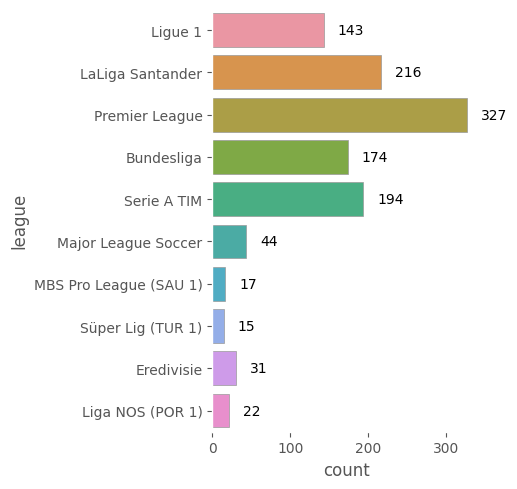

In [35]:
g = sns.catplot(
    data=df_top_league_players, y="league", kind="count", edgecolor=".6",
)

ax = g.facet_axis(0, 0)

plt.grid(False)

ax.set(facecolor = "white")

for c in ax.containers:
    labels = [(round(v.get_width())) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=10, color='black')

In [36]:
df_top_league_players['country'].value_counts(normalize=True)

England          0.099746
France           0.098901
Spain            0.081995
Germany          0.073542
Brazil           0.071851
                   ...   
Russia           0.000845
FYR Macedonia    0.000845
Romania          0.000845
Armenia          0.000845
Burkina Faso     0.000845
Name: country, Length: 67, dtype: float64

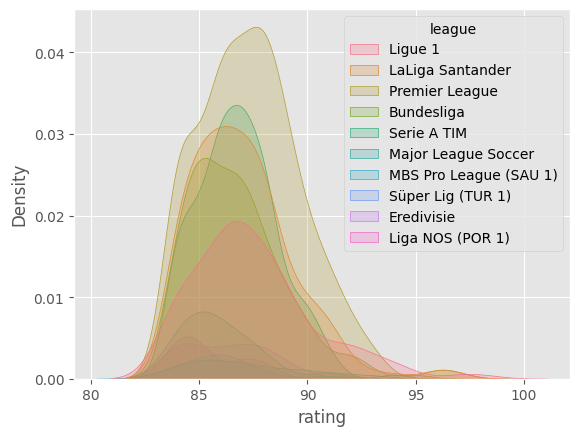

In [37]:
ax = sns.kdeplot(data=df_top_league_players, x="rating", hue='league', 
                                                warn_singular=False,
                                                fill=True
                                                )
plt.setp(ax.get_legend().get_texts(), color='black')
plt.setp(ax.get_legend().get_title(), color='black')

plt.show()

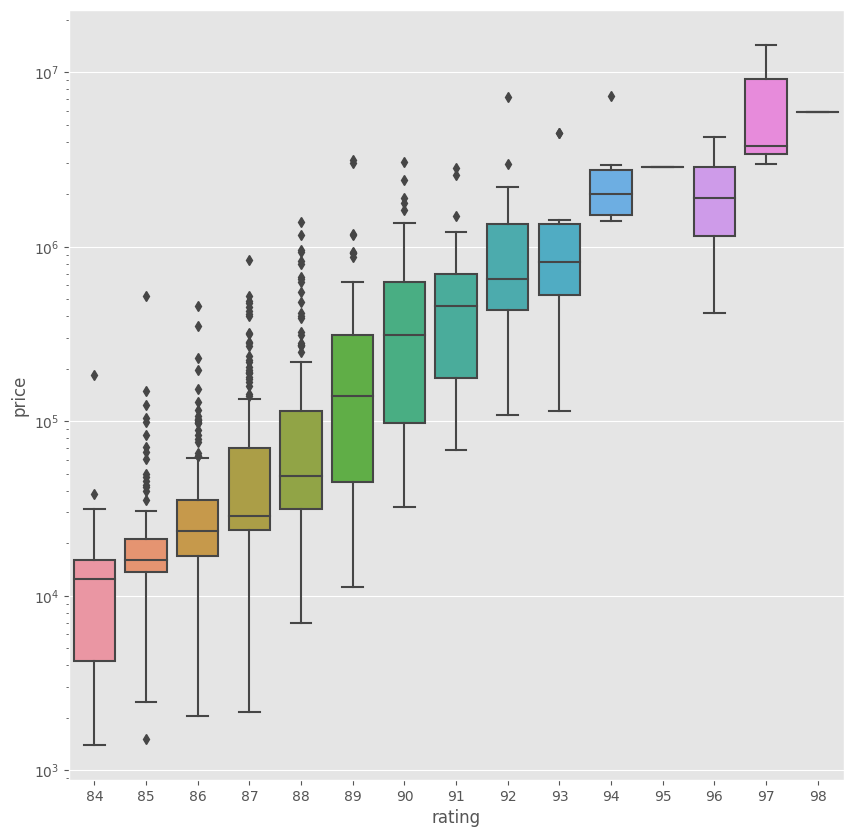

In [38]:
f, ax = plt.subplots(figsize=(10, 10))
ax.set_yscale("log")
f = sns.boxplot(x='rating',y='price',data=df_top_league_players.query('price > 0'))


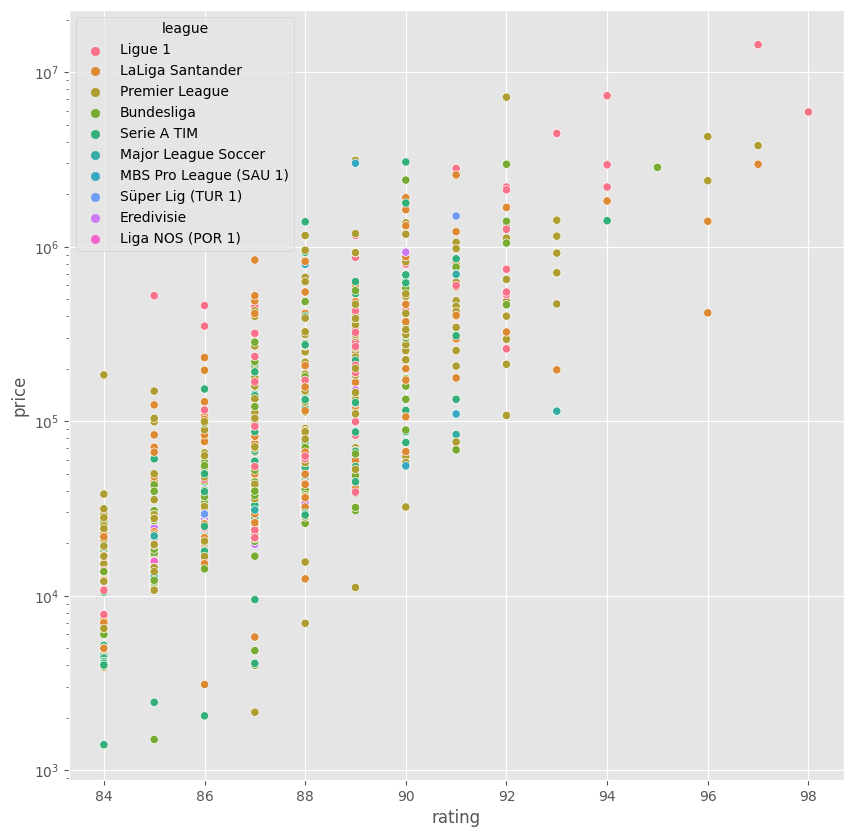

In [39]:
ax = plt.subplots(figsize=(10, 10))

ax = sns.scatterplot(data=df_top_league_players,
                        y='price',
                        x='rating',
                        hue='league')

ax.set_yscale("log")

plt.setp(ax.get_legend().get_texts(), color='black')
plt.setp(ax.get_legend().get_title(), color='black')

plt.show()

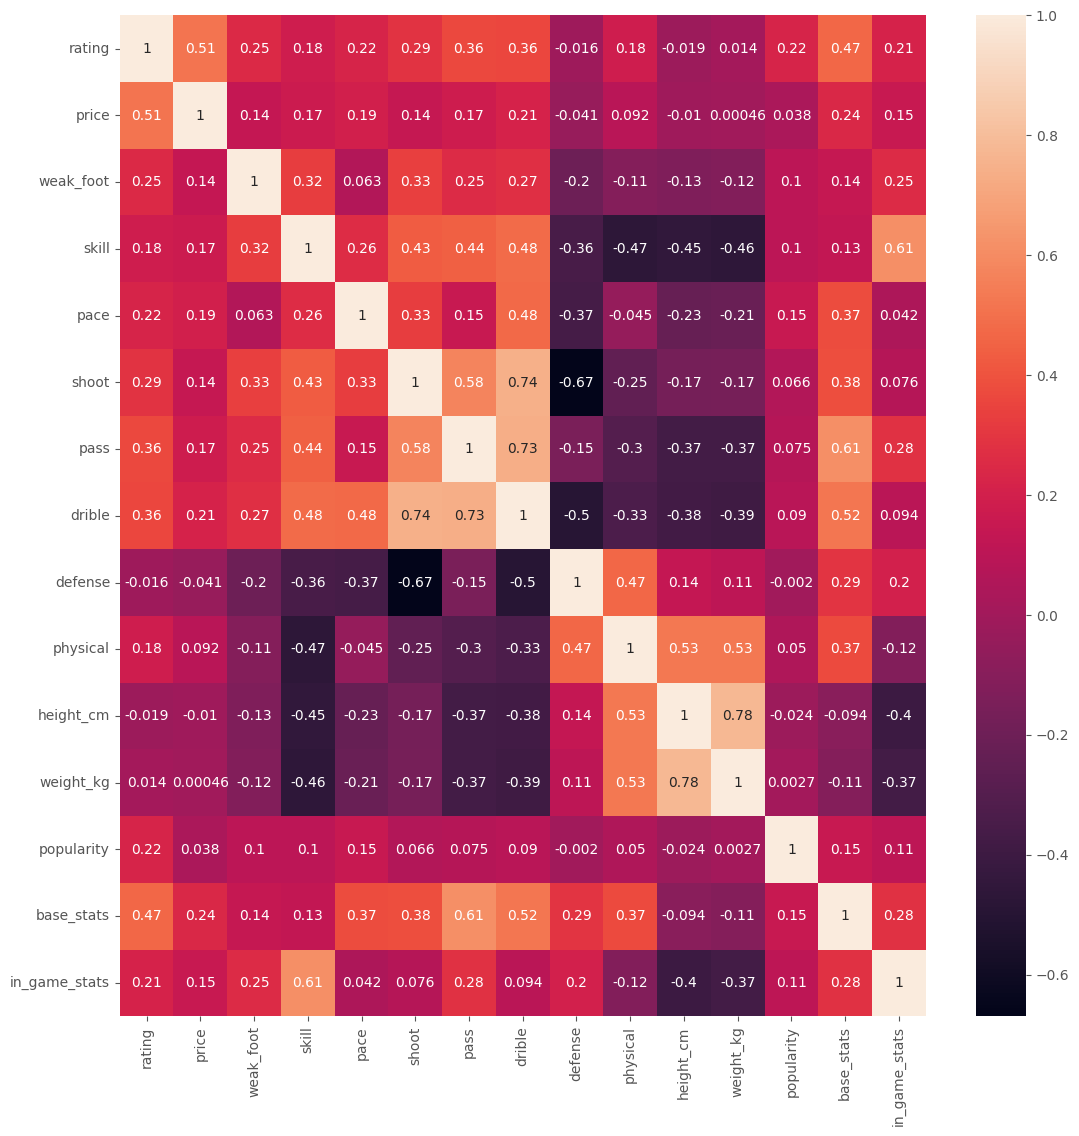

In [40]:
df_corr = df_top_league_players[['rating','price', 'weak_foot', 'skill', 
                                 'pace', 'shoot', 'pass', 'drible', 'defense', 'physical', 
                                 'height_cm', 'weight_kg', 'popularity', 'base_stats','in_game_stats' ]].dropna().corr()
ax = plt.subplots(figsize=(13, 13))

ax = sns.heatmap(df_corr, annot=True)

plt.show()

In [41]:
df_top_league_players.query('price > 0')\
                    .groupby('league')['price']\
                    .agg(['mean','max', 'min', 'count'])\
                    .sort_values('mean', ascending=False)

,mean,max,min,count
league,,,,
Ligue 1,534730.708661,14380000,4200,127
MBS Pro League (SAU 1),411925.000000,3010000,17250,10
Premier League,235649.322034,7200000,2150,295
LaLiga Santander,180989.054726,2970000,3100,201
Süper Lig (TUR 1),159104.545455,1500000,4100,11
Bundesliga,134443.670886,2970000,1500,158
Serie A TIM,122918.131868,3060000,1400,182
Eredivisie,70676.000000,931000,4000,25
Major League Soccer,50633.823529,695000,4100,34


In [42]:
test = df_top_league_players[['name', 'position', 'pace']]
test

,name,position,pace
0,Lionel Messi,RW,93
1,Karim Benzema,CF,92
2,Kylian Mbappé,ST,99
3,Kevin De Bruyne,CM,85
4,Thibaut Courtois,GK,90
...,...,...,...
1210,Oxlade-Chamberlain,CM,83
1211,Noni Madueke,RW,91
1212,Pervis Estupiñán,LB,86
1213,Mattia Zaccagni,LW,89


- Fastest player by position
- Best deal (cheapest with good ingame stats)
- IMC dos jogadores
- Strongest players by position
- Overpriced by league
- More expensive league
- Fastest nation
- Expensive club
- league with players from another country

In [43]:
df_top_league_players[['name', 'position', 'pace']]\
                    .sort_values(['pace'], ascending=False)\
                    .drop_duplicates(subset='name', keep='first')\
                    .drop_duplicates(subset='position', keep='first')
                    

,name,position,pace
136,Moussa Diaby,RM,99
252,Al-Owairan,CAM,99
2,Kylian Mbappé,ST,99
71,Vinícius Júnior,LW,99
582,Theo Walcott,RW,99
12,Achraf Hakimi,RB,99
697,Moses Simon,LM,98
14,Theo Hernández,LB,98
827,Jeremie Frimpong,RWB,96
297,Jorge Campos,GK,95
